<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/LSTM_Covid_Data_Vacinacao_TESTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importações**

In [1]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Carregando os dados**

In [2]:
# Motando o drive para importar os datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregando os dados parte 1 estado de Goiás 
df_DF = pd.read_csv('/content/drive/My Drive/Colab Notebooks/PFC1/Dados_estados/Dados-Part1-DF.csv',sep=';',low_memory=False)

# **Tratamento dos dados - Distrito Federal**

> Distrito Federal



In [4]:
df_DF

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,...,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,f3c541ba5c53534a6b9e5778ee3542b6a07d58872e2011...,30.0,1991-03-24,F,4.0,AMARELA,530010,10,BRASILIA,...,1.0,Comorbidades,216VCD219W,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-08-23,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,58a057e4042afb717b19cb0085b89aa43b4a46c15e67dc...,52.0,1969-07-23,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,1.0,Comorbidades,FG3535,PFIZER,Organization/28290,2022-01-17,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,32d5ec8c804d0d84826ea10b4d85c76859e4cca0a3e143...,41.0,1980-04-23,M,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,9.0,Trabalhadores de Saúde,214VCD064Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-07-01,1ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,cfecbdd2a3238e0df14031e2e61f64394690d3ddb36a2d...,43.0,1978-04-20,F,1.0,BRANCA,230440,10,FORTALEZA,...,9.0,Trabalhadores de Saúde,FG3528,PFIZER,Organization/00394544000851,2021-10-06,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,62374d60fc07d0e69ca84847a19761fdf481f35c873355...,57.0,1964-02-12,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,2.0,Faixa Etária,217VCD243Z,ASTRAZENECA/FIOCRUZ,Organization/33781055000135,2021-09-08,2ª Dose,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130782,23677924-ca52-4d80-a4b0-e9a53865874f-i0b0,b803942271aeb7e3f47b257cb5e8b9c129401625d17155...,36.0,1985-03-12,F,99.0,SEM INFORMACAO,530010,10,BRASILIA,...,2.0,Faixa Etária,FD7221,PFIZER,Organization/00394544000851,2021-07-29,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI
2130783,2371443a-5a8a-4281-b295-23732cd7c07c-i0b0,148a4f962098c3d498f276b3558fca4775df4190575129...,45.0,1976-04-06,F,1.0,BRANCA,530010,10,BRASILIA,...,8.0,Trabalhadores da Educação,210A21A,JANSSEN,Organization/00394544000851,2021-07-07,Dose,88,COVID-19 JANSSEN - Ad26.COV2.S,Novo PNI
2130784,237d3869-1d9e-4d0a-adda-ce0b6544a27c-i0b0,deba7487cfa06c28175211ff003ab28cf81eb2bc23bf83...,24.0,1997-07-21,M,2.0,PRETA,530010,10,BRASILIA,...,2.0,Faixa Etária,210370A,SINOVAC/BUTANTAN,Organization/61189445000156,2021-09-11,1ª Dose,86,COVID-19 SINOVAC/BUTANTAN - CORONAVAC,Novo PNI
2130785,23876e1d-85f5-45fd-b66c-241232a9987f-i0b0,c14ffe609a1c7966a033fb4a547e0c45604e739921da42...,27.0,1994-12-09,F,3.0,PARDA,530010,10,BRASILIA,...,2.0,Faixa Etária,FK8917,PFIZER,Organization/28290,2022-02-12,Reforço,87,COVID-19 PFIZER - COMIRNATY,Novo PNI


IBGE - População estimada do Distrito Federal

3.094.325
pessoas
   [2021] : https://www.ibge.gov.br/cidades-e-estados/df/.html?

In [5]:
# mostra os nomes das colunas
df_DF.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_dataNascimento', 'paciente_enumSexoBiologico',
       'paciente_racaCor_codigo', 'paciente_racaCor_valor',
       'paciente_endereco_coIbgeMunicipio', 'paciente_endereco_coPais',
       'paciente_endereco_nmMunicipio', 'paciente_endereco_nmPais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumNacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaoSocial', 'estalecimento_noFantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoAtendimento_codigo',
       'vacina_grupoAtendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataAplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem'],
      dtype='object')

In [6]:
# Selecionar 3 colunas para a primeira análise
df_DF1 = df_DF.iloc[: , [0,28,30]]
df_DF1.head()

,document_id,vacina_descricao_dose,vacina_nome
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,1ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,Reforço,COVID-19 PFIZER - COMIRNATY
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,2ª Dose,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [7]:
df_DF1.groupby(['vacina_descricao_dose']).count()['document_id']

vacina_descricao_dose
1ª Dose                825977
1ª Dose Revacinação        19
2ª Dose                763483
2ª Dose Revacinação        32
2º Reforço              96467
3ª Dose                    22
3º Reforço                151
Dose                    20985
Dose Adicional          18272
Reforço                405243
Única                     136
Name: document_id, dtype: int64

In [8]:
# Selecionar 7 colunas para a segunda análise
df_DF2 = df_DF.iloc[: , [0,2,20,21,22,23,30]]
df_DF2.head()

,document_id,paciente_idade,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_nome
0,24fe9a7b-560c-475e-81e0-ad0b6b7fa7d8-i0b0,30.0,103.0,Diabetes Mellitus,1.0,Comorbidades,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
1,21b0a35c-28cf-4a87-aaba-5df2ce0cac55-i0b0,52.0,103.0,Diabetes Mellitus,1.0,Comorbidades,COVID-19 PFIZER - COMIRNATY
2,250e7617-b0e7-4fba-abae-aa3b02c9151f-i0b0,41.0,926.0,Outros,9.0,Trabalhadores de Saúde,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD
3,21b5773b-b115-41b4-902c-643639b09b8c-i0b0,43.0,925.0,Terapeuta Ocupacional,9.0,Trabalhadores de Saúde,COVID-19 PFIZER - COMIRNATY
4,25129d99-1651-4b6c-ba2a-2192068fdc1b-i0b0,57.0,201.0,Pessoas de 18 a 64 anos,2.0,Faixa Etária,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD


In [9]:
# Selecionar 7 colunas para a segunda análise
df_DF3 = df_DF.iloc[: , [27,28]]
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-23,2ª Dose
1,2022-01-17,Reforço
2,2021-07-01,1ª Dose
3,2021-10-06,Reforço
4,2021-09-08,2ª Dose


In [10]:
#converter a coluna vacina_dataAplicacao para o tipo datetime
df_DF3[['vacina_dataAplicacao']] = df_DF3[['vacina_dataAplicacao']].apply(pd.to_datetime)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
#Confirmando se trocou de tipo
df_DF3.dtypes

vacina_dataAplicacao     datetime64[ns]
vacina_descricao_dose            object
dtype: object

In [12]:
df_DF3.head()

,vacina_dataAplicacao,vacina_descricao_dose
0,2021-08-23,2ª Dose
1,2022-01-17,Reforço
2,2021-07-01,1ª Dose
3,2021-10-06,Reforço
4,2021-09-08,2ª Dose


In [13]:
# Ordenando as vacinas pela data de aplicação , em ordem crescente de data
df_DF3 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' ")
df_DF3.sort_values(by=['vacina_dataAplicacao'])

,vacina_dataAplicacao,vacina_descricao_dose
1461058,2021-01-04,2ª Dose
1362538,2021-01-11,1ª Dose
1076490,2021-01-17,1ª Dose
1277330,2021-01-17,2ª Dose
1801715,2021-01-18,1ª Dose
...,...,...
221523,2022-06-25,2º Reforço
705425,2022-06-25,Reforço
787284,2022-06-25,2ª Dose
777906,2022-06-25,Reforço


Nas próximas duas células filtramos por mês as vacinas aplicadas no ano de 2021 e salvamos em diferentes DataFrames

In [14]:
df_21_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2021-01-01' and vacina_dataAplicacao <= '2021-01-31'")
df_21_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2021-02-01' and vacina_dataAplicacao <= '2021-02-28'")
df_21_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2021-03-01' and vacina_dataAplicacao <= '2021-03-31'")
df_21_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2021-04-01' and vacina_dataAplicacao <= '2021-04-30'")
df_21_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2021-05-01' and vacina_dataAplicacao <= '2021-05-31'")
df_21_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2021-06-01' and vacina_dataAplicacao <= '2021-06-30'")

In [15]:
df_21_DF3_mes7 = df_DF3.query(" vacina_dataAplicacao >= '2021-07-01' and vacina_dataAplicacao <= '2021-07-31'")
df_21_DF3_mes8 = df_DF3.query(" vacina_dataAplicacao >= '2021-08-01' and vacina_dataAplicacao <= '2021-08-31'")
df_21_DF3_mes9 = df_DF3.query(" vacina_dataAplicacao >= '2021-09-01' and vacina_dataAplicacao <= '2021-09-30'")
df_21_DF3_mes10 = df_DF3.query(" vacina_dataAplicacao >= '2021-10-01' and vacina_dataAplicacao <= '2021-10-31'")
df_21_DF3_mes11 = df_DF3.query(" vacina_dataAplicacao >= '2021-11-01' and vacina_dataAplicacao <= '2021-11-30'")
df_21_DF3_mes12 = df_DF3.query(" vacina_dataAplicacao >= '2021-12-01' and vacina_dataAplicacao <= '2021-12-31'")

Na próxima célula filtramos por mês as vacinas aplicadas no ano de 2022 e salvamos em diferentes DataFrames

In [16]:
df_22_DF3_mes1 = df_DF3.query(" vacina_dataAplicacao >= '2022-01-01' and vacina_dataAplicacao <= '2022-01-31'")
df_22_DF3_mes2 = df_DF3.query(" vacina_dataAplicacao >= '2022-02-01' and vacina_dataAplicacao <= '2022-02-28'")
df_22_DF3_mes3 = df_DF3.query(" vacina_dataAplicacao >= '2022-03-01' and vacina_dataAplicacao <= '2022-03-31'")
df_22_DF3_mes4 = df_DF3.query(" vacina_dataAplicacao >= '2022-04-01' and vacina_dataAplicacao <= '2022-04-30'")
df_22_DF3_mes5 = df_DF3.query(" vacina_dataAplicacao >= '2022-05-01' and vacina_dataAplicacao <= '2022-05-31'")
df_22_DF3_mes6 = df_DF3.query(" vacina_dataAplicacao >= '2022-06-01' and vacina_dataAplicacao <= '2022-06-30'")

Agora agrupamos pela descrição de dose para analisarmos quantas pessoas receberam 1º Dose, 2º Dose , Dose Adicional e Reforço por mês do ano de 2021

In [17]:
df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

,vacina_dataAplicacao
vacina_descricao_dose,
1ª Dose,2854
2ª Dose,5581
2º Reforço,52295
3º Reforço,150
Dose,237
Dose Adicional,1659
Reforço,27934


In [18]:
df_21_DF3_mes1count = df_21_DF3_mes1.groupby('vacina_descricao_dose').count()
df_21_DF3_mes2count = df_21_DF3_mes2.groupby('vacina_descricao_dose').count()
df_21_DF3_mes3count = df_21_DF3_mes3.groupby('vacina_descricao_dose').count()
df_21_DF3_mes4count = df_21_DF3_mes4.groupby('vacina_descricao_dose').count()
df_21_DF3_mes5count = df_21_DF3_mes5.groupby('vacina_descricao_dose').count()
df_21_DF3_mes6count = df_21_DF3_mes6.groupby('vacina_descricao_dose').count()

In [19]:
df_21_DF3_mes7count = df_21_DF3_mes7.groupby('vacina_descricao_dose').count()
df_21_DF3_mes8count = df_21_DF3_mes8.groupby('vacina_descricao_dose').count()
df_21_DF3_mes9count = df_21_DF3_mes9.groupby('vacina_descricao_dose').count()
df_21_DF3_mes10count = df_21_DF3_mes10.groupby('vacina_descricao_dose').count()
df_21_DF3_mes11count = df_21_DF3_mes11.groupby('vacina_descricao_dose').count()
df_21_DF3_mes12count = df_21_DF3_mes12.groupby('vacina_descricao_dose').count()

In [20]:
df_22_DF3_mes1count = df_22_DF3_mes1.groupby('vacina_descricao_dose').count()
df_22_DF3_mes2count = df_22_DF3_mes2.groupby('vacina_descricao_dose').count()
df_22_DF3_mes3count = df_22_DF3_mes3.groupby('vacina_descricao_dose').count()
df_22_DF3_mes4count = df_22_DF3_mes4.groupby('vacina_descricao_dose').count()
df_22_DF3_mes5count = df_22_DF3_mes5.groupby('vacina_descricao_dose').count()
df_22_DF3_mes6count = df_22_DF3_mes6.groupby('vacina_descricao_dose').count()

In [21]:
DF_Vacina_Mes_1_21 = pd.merge(df_21_DF3_mes1count, df_21_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_21', '_mes2_21'))
DF_Vacina_Mes_2_21 = pd.merge(DF_Vacina_Mes_1_21, df_21_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_21', '_mes3_21'))
DF_Vacina_Mes_3_21 = pd.merge(DF_Vacina_Mes_2_21, df_21_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_21', '_mes4_21'))
DF_Vacina_Mes_4_21 = pd.merge(DF_Vacina_Mes_3_21, df_21_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_21', '_mes5_21'))
DF_Vacina_Mes_5_21 = pd.merge(DF_Vacina_Mes_4_21, df_21_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_21', '_mes6_21'))
DF_Vacina_Mes_6_21 = pd.merge(DF_Vacina_Mes_5_21, df_21_DF3_mes7count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes6_21', '_mes7_21'))

In [22]:
DF_Vacina_Mes_7_21 = pd.merge(DF_Vacina_Mes_6_21, df_21_DF3_mes8count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes7_21', '_mes8_21'))
DF_Vacina_Mes_8_21 = pd.merge(DF_Vacina_Mes_7_21, df_21_DF3_mes9count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes8_21', '_mes9_21'))
DF_Vacina_Mes_9_21 = pd.merge(DF_Vacina_Mes_8_21, df_21_DF3_mes10count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes9_21', '_mes10_21'))
DF_Vacina_Mes_10_21 = pd.merge(DF_Vacina_Mes_9_21, df_21_DF3_mes11count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes10_21', '_mes11_21'))
DF_Vacina_Mes_11_21 = pd.merge(DF_Vacina_Mes_10_21, df_21_DF3_mes12count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes12_21'))
DF_Vacina_Mes_12_21 = pd.merge(DF_Vacina_Mes_11_21, df_22_DF3_mes1count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes11_21', '_mes1_22'))

In [23]:
DF_Vacina_Mes_1_22 = pd.merge(DF_Vacina_Mes_12_21, df_22_DF3_mes2count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes1_22', '_mes2_22'))
DF_Vacina_Mes_2_22 = pd.merge(DF_Vacina_Mes_1_22, df_22_DF3_mes3count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes2_22', '_mes3_22'))
DF_Vacina_Mes_3_22 = pd.merge(DF_Vacina_Mes_2_22, df_22_DF3_mes4count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes3_22', '_mes4_22'))
DF_Vacina_Mes_4_22 = pd.merge(DF_Vacina_Mes_3_22, df_22_DF3_mes5count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes4_22', '_mes5_22'))
DF_Vacina_Mes_5_22 = pd.merge(DF_Vacina_Mes_4_22, df_22_DF3_mes6count, how = 'outer', on = 'vacina_descricao_dose',suffixes=('_mes5_22', '_mes6_22'))

In [24]:
#Imprimir o DataFrame Vacina_Mes_11 que corresponde todos os os meses juntos
DF_Vacina_Mes_5_22

,vacina_dataAplicacao_mes1_21,vacina_dataAplicacao_mes2_21,vacina_dataAplicacao_mes3_21,vacina_dataAplicacao_mes4_21,vacina_dataAplicacao_mes5_21,vacina_dataAplicacao_mes6_21,vacina_dataAplicacao_mes7_21,vacina_dataAplicacao_mes8_21,vacina_dataAplicacao_mes9_21,vacina_dataAplicacao_mes10_21,vacina_dataAplicacao_mes11_21,vacina_dataAplicacao_mes12_21,vacina_dataAplicacao_mes1_22,vacina_dataAplicacao_mes2_22,vacina_dataAplicacao_mes3_22,vacina_dataAplicacao_mes4_22,vacina_dataAplicacao_mes5_22,vacina_dataAplicacao_mes6_22
vacina_descricao_dose,,,,,,,,,,,,,,,,,,
1ª Dose,15751.0,26463.0,59149.0,47842.0,63584.0,115101.0,109837.0,232199.0,62581.0,14113.0,9207.0,6636.0,24740.0,24567.0,6591.0,2602.0,2024.0,2854.0
2ª Dose,33.0,15003.0,11156.0,58468.0,22913.0,6385.0,65836.0,85234.0,136416.0,136760.0,98930.0,50097.0,18404.0,11810.0,22337.0,11150.0,6814.0,5581.0
Dose Adicional,3.0,3.0,NaN,NaN,NaN,10.0,7.0,3.0,1150.0,2315.0,1591.0,2873.0,3248.0,2185.0,1018.0,795.0,1412.0,1659.0
Reforço,2.0,3.0,8.0,2.0,NaN,NaN,6.0,4.0,2771.0,38222.0,28863.0,55327.0,91228.0,65870.0,56079.0,21122.0,17802.0,27934.0
Dose,NaN,NaN,1.0,NaN,NaN,5104.0,12325.0,1513.0,522.0,237.0,1.0,39.0,83.0,168.0,296.0,243.0,216.0,237.0
Única,NaN,NaN,60.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2º Reforço,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,2.0,3.0,9.0,2.0,15.0,83.0,15471.0,28585.0,52295.0
3ª Dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN
1ª Dose Revacinação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,5.0,NaN,1.0,NaN,NaN


In [25]:
# Transposta do DataFrame Vacina_Mes_11
DF_Vacina_Mes_5_22.T

vacina_descricao_dose,1ª Dose,2ª Dose,Dose Adicional,Reforço,Dose,Única,2º Reforço,3ª Dose,1ª Dose Revacinação,2ª Dose Revacinação,3º Reforço
vacina_dataAplicacao_mes1_21,15751.0,33.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes2_21,26463.0,15003.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes3_21,59149.0,11156.0,NaN,8.0,1.0,60.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes4_21,47842.0,58468.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes5_21,63584.0,22913.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes6_21,115101.0,6385.0,10.0,NaN,5104.0,1.0,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes7_21,109837.0,65836.0,7.0,6.0,12325.0,NaN,1.0,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes8_21,232199.0,85234.0,3.0,4.0,1513.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes9_21,62581.0,136416.0,1150.0,2771.0,522.0,NaN,NaN,NaN,NaN,NaN,NaN
vacina_dataAplicacao_mes10_21,14113.0,136760.0,2315.0,38222.0,237.0,NaN,2.0,2.0,NaN,NaN,NaN


In [26]:
#Susbtituir os valores NaN por 0
DF_Count_Mes_Dose = DF_Vacina_Mes_5_22.T.replace(np.nan,0)

Substituir vacina_dataAplicacao_mes1 por VA1

In [27]:
DF_Count_Mes_Dose.index = ["Janeiro-2021","Fevereiro-2021","Março-2021","Abril-2021","Maio-2021","Junho-2021","Julho-2021","Agosto-2021","Setembro-2021","Outubro-2021","Novembro-2021","Dezembro-2021","Janeiro-2022","Fevereiro-2022","Março-2022","Abril-2022","Maio-2022","Junho-2022"]

In [28]:
DF_Count_Mes = df_DF3.groupby('vacina_dataAplicacao').count()

In [29]:
X = DF_Count_Mes['vacina_descricao_dose']

In [30]:
X = X.to_numpy()
n = 615

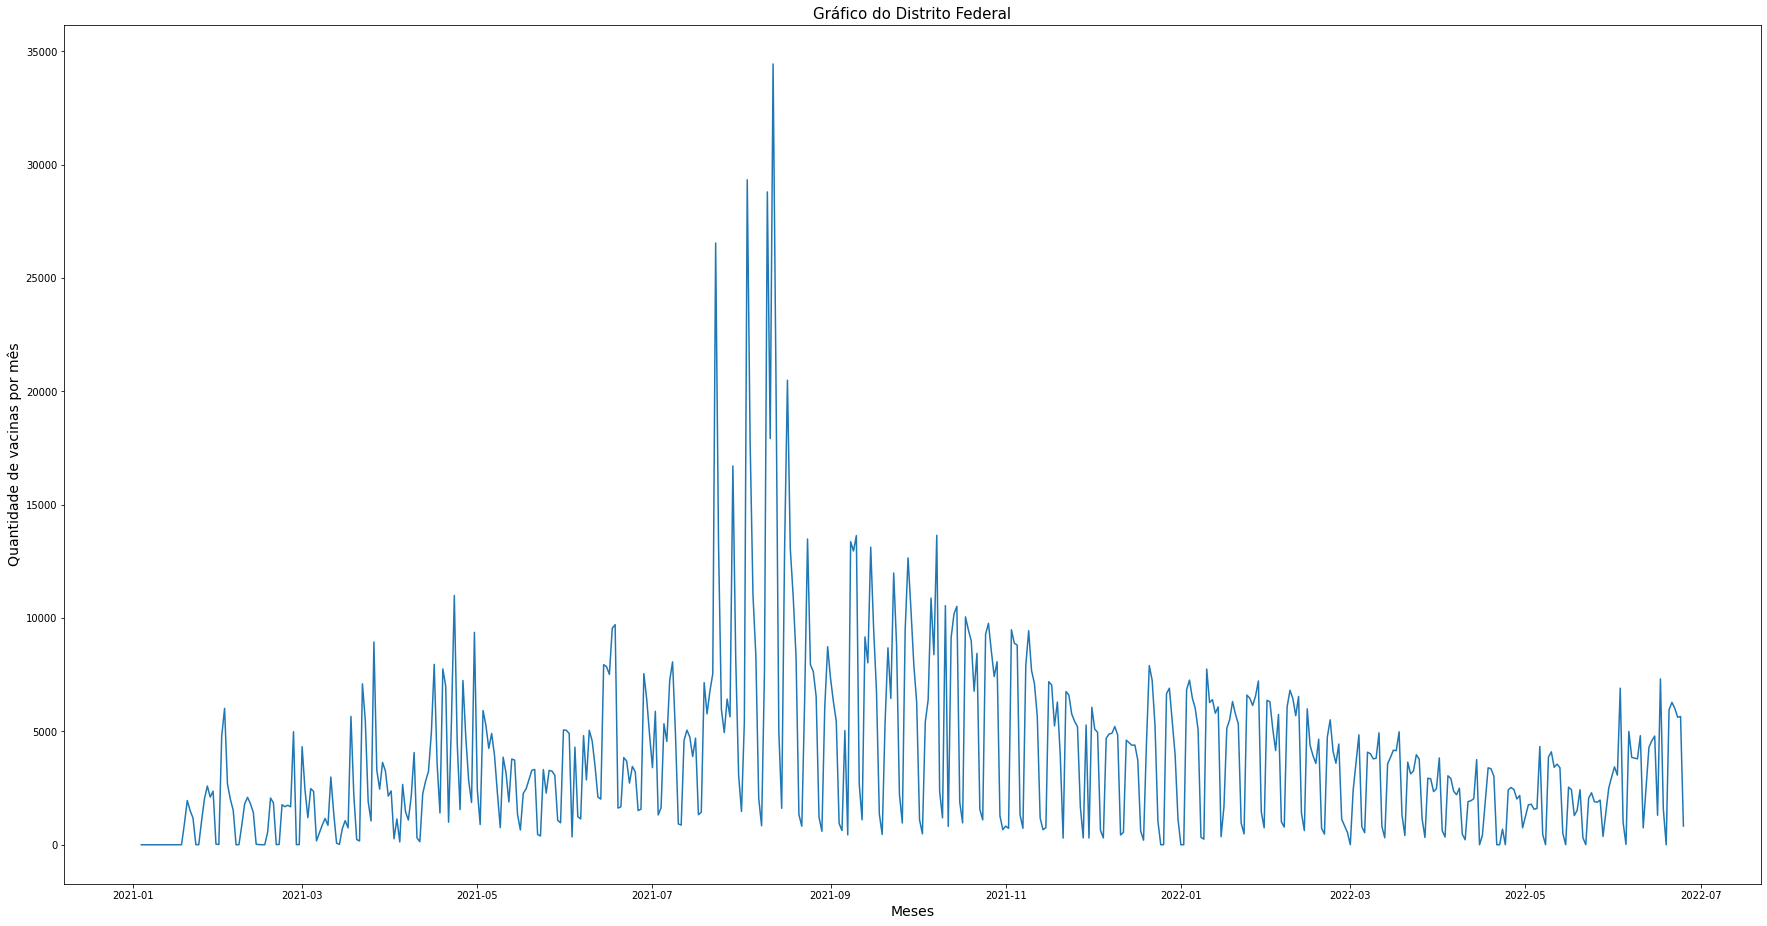

In [31]:
plt.figure(figsize=(30.4,15.8))
plt.title("Gráfico do Distrito Federal",fontsize=15)
plt.ylabel('Quantidade de vacinas por mês', fontsize = 14)
plt.xlabel('Meses',fontsize = 14)
plt.plot(DF_Count_Mes)
plt.show()

# **Preparando os dados**

In [32]:
# Conjunto de pontos passados para o modelo LSTM
window = 10

# Separar os dados em 80% treino e 20% teste

last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Armarzenar "window" números de pontos em uma sequência
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Transformar os dados para o formato LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)
#print(xin[0:5])

# **Modelo LSTM**

In [33]:
# Keras é uma interface do TensorFlow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Inicializar modelo LSTM

m = Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/50
8/8 [==============================] - 4s 26ms/step - loss: 41612624.0000
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 41597820.0000
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 41580252.0000
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 41563992.0000
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 41549248.0000
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 41538004.0000
Epoch 7/50
8/8 [==============================] - 0s 21ms/step - loss: 41528452.0000
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 41521720.0000
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 41515908.0000
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 41509968.0000
Epoch 11/50
8/8 [==============================] - 0s 13ms/step - loss: 41505012.0000
Epoch 12/50
8/8 [==============================] - 0s 13ms/step

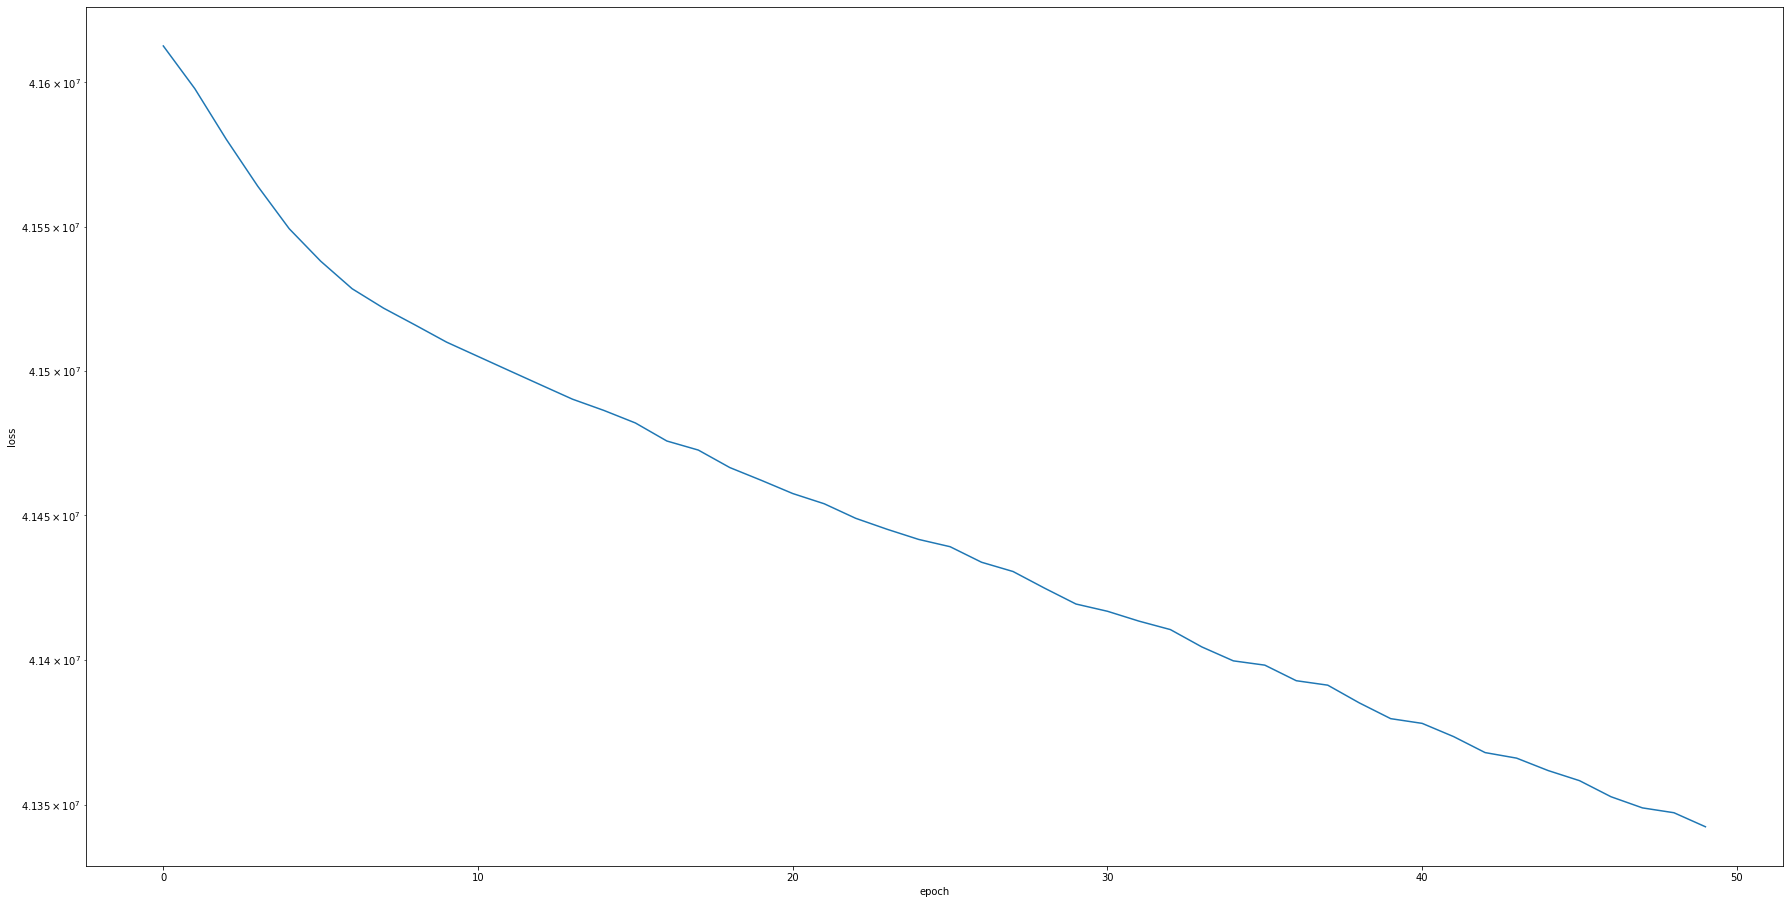

In [34]:
# Modelo LSTM fit
history = m.fit(xin, next_X, epochs = 50, batch_size = 50, verbose = 1)

plt.figure(figsize=(30.4,15.8))
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

# **Validação**

4/4 [==============================] - 1s 6ms/step


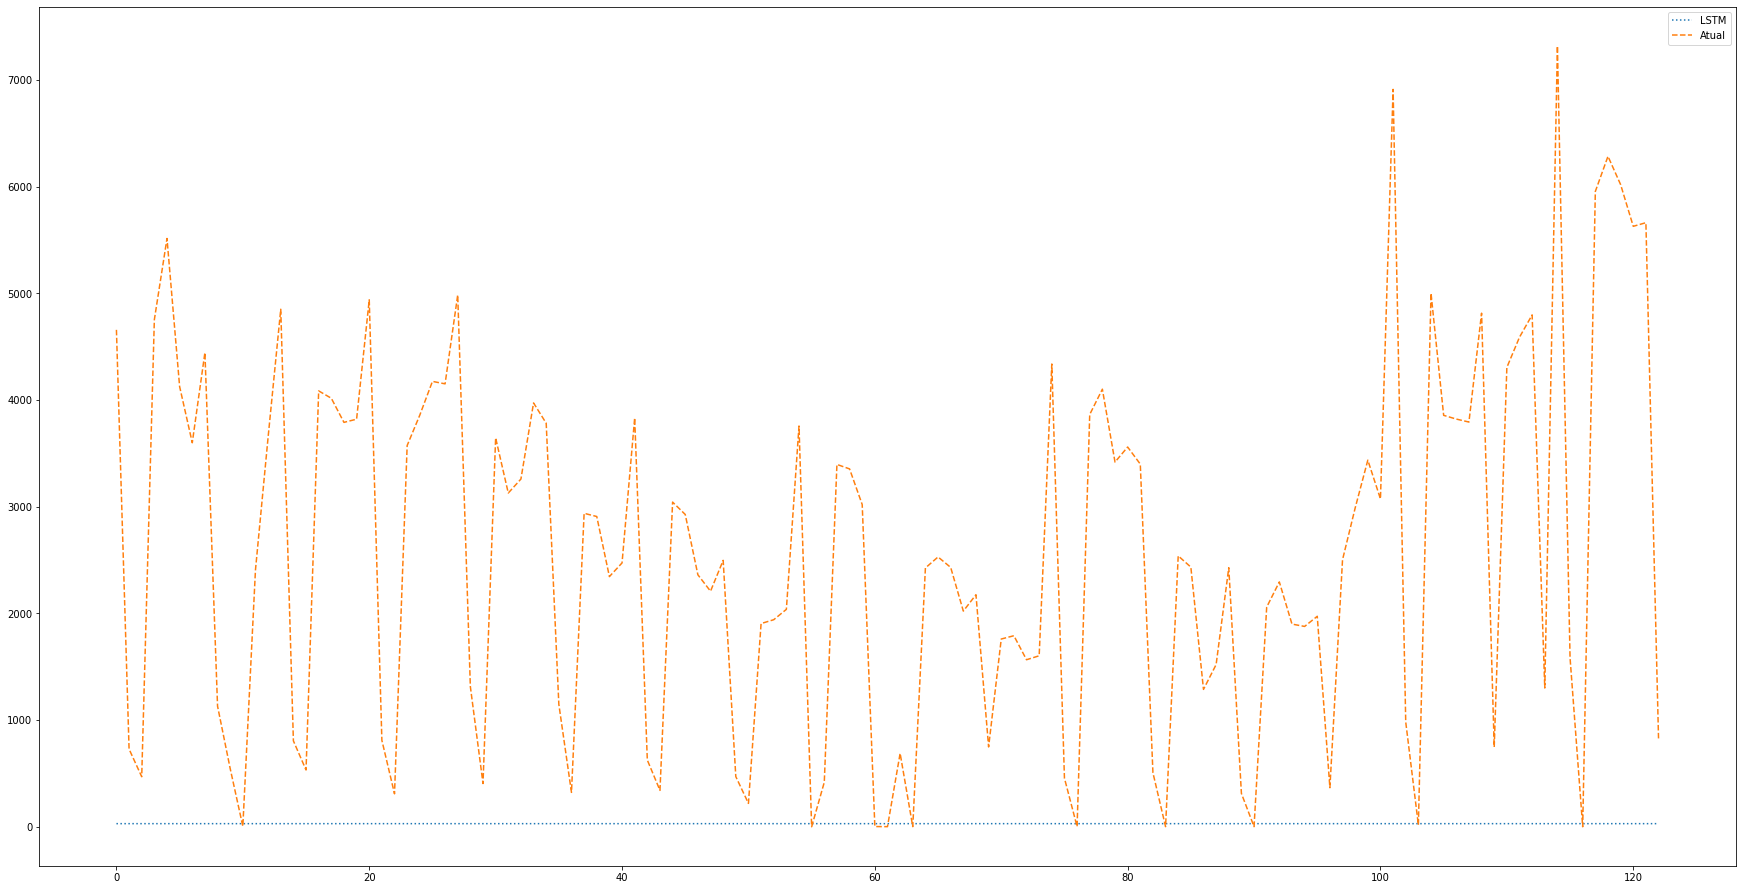

In [35]:
# Armazenar "window" pontos em uma sequência
xin = []
next_x1 = []

for i in range(window, len(Xtest)):
  xin.append(Xtest[i-window:i])
  next_x1.append(Xtest[i])

# Transformar os dados para o formato LSTM
xin, next_x1 = np.array(xin), np.array(next_x1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predizer o próximo valor (1 passo a frente)
X_pred = m .predict(xin)

# Mostrar predição VS dados de teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred, ':', label = 'LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()

# **Forecasting**

1/1 [==============================] - 0s 19ms/step


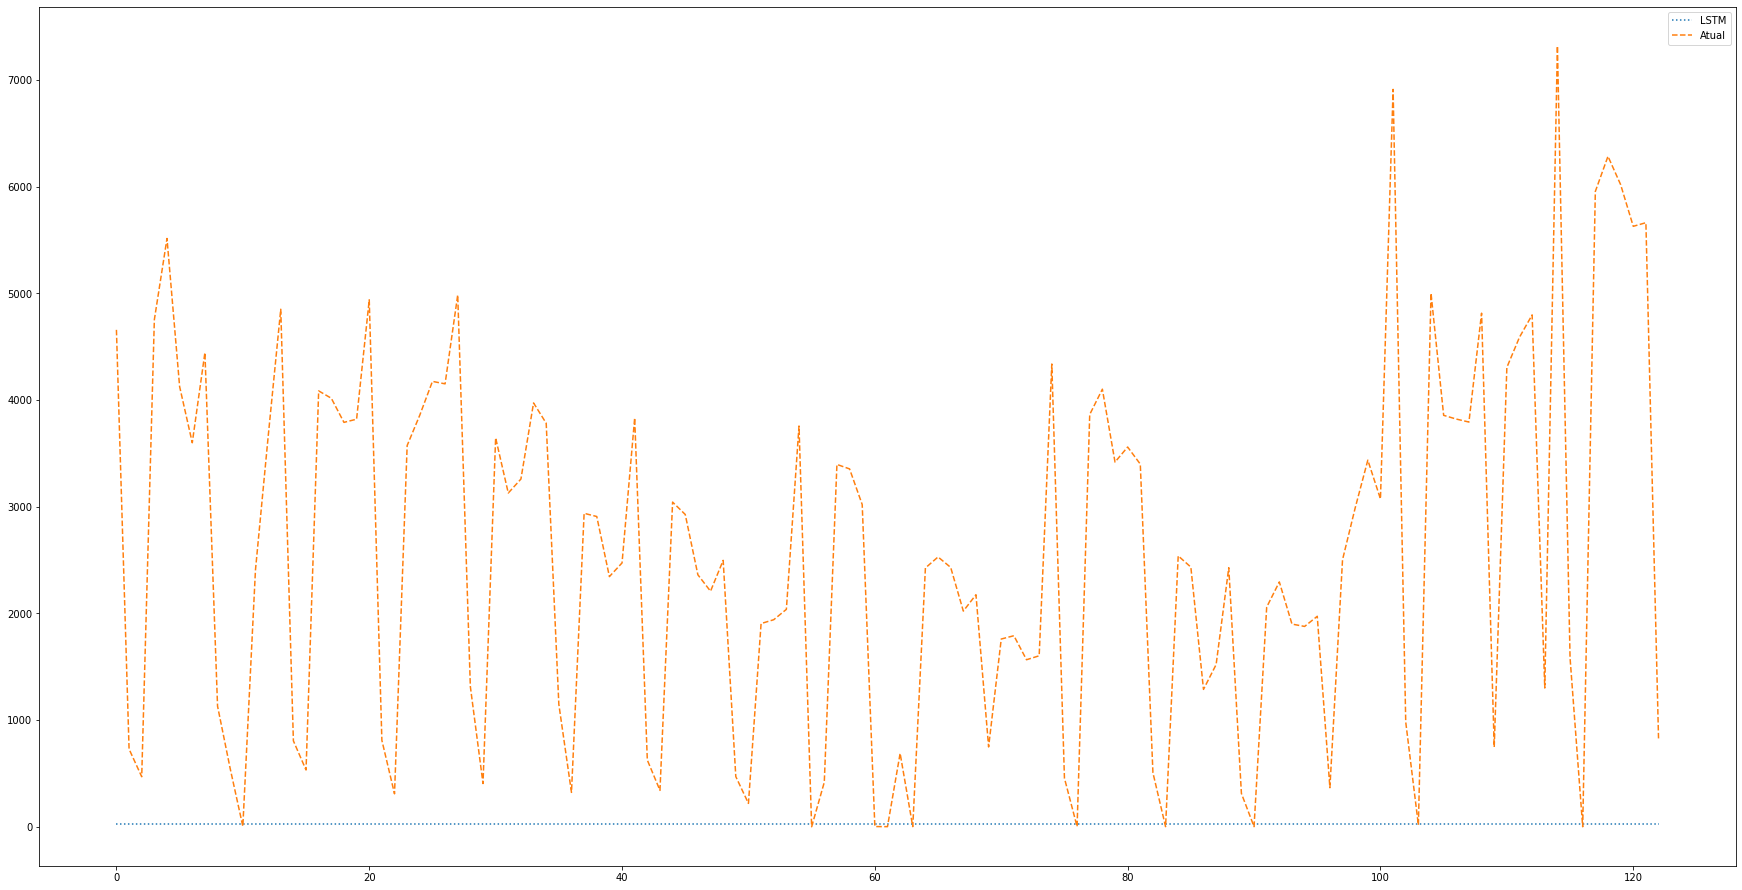

In [37]:
# Usando valores preditivos para predizer o próximo passo

X_pred = Xtest.copy()
for i in range(window, len(X_pred)):
  xin = X_pred[i-window:i].reshape((1, window, 1))
  X_pred[i] = m.predict(xin)

# Mostrar predição VS dados do teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred[window:], ':', label='LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()